In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Check scikit-learn version
sklearn_version = sklearn.__version__
print(f"scikit-learn version: {sklearn_version}")

scikit-learn version: 1.4.2


### 1. Data Loading and Initial Exploration

In [3]:
# Load the dataset
df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')

In [4]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [5]:
# Display the first few rows
print(df.head())

   Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \


In [6]:
# Display summary statistics
print(df.describe())

       Are you self-employed?  \
count             1433.000000   
mean                 0.200279   
std                  0.400349   
min                  0.000000   
25%                  0.000000   
50%                  0.000000   
75%                  0.000000   
max                  1.000000   

       Is your employer primarily a tech company/organization?  \
count                                        1146.000000         
mean                                            0.770506         
std                                             0.420691         
min                                             0.000000         
25%                                             1.000000         
50%                                             1.000000         
75%                                             1.000000         
max                                             1.000000         

       Is your primary role within your company related to tech/IT?  \
count                               

In [7]:
# Check for missing values
print(df.isnull().sum())

Are you self-employed?                                                                  0
How many employees does your company or organization have?                            287
Is your employer primarily a tech company/organization?                               287
Is your primary role within your company related to tech/IT?                         1170
Does your employer provide mental health benefits as part of healthcare coverage?     287
                                                                                     ... 
What US state or territory do you live in?                                            593
What country do you work in?                                                            0
What US state or territory do you work in?                                            582
Which of the following best describes your work position?                               0
Do you work remotely?                                                                   0
Length: 63

**Explanation:**  
We start by loading the dataset and performing initial exploratory data analysis.  
This helps us understand the structure of the data, including the number of features, data types, and presence of missing values.  

### 2. Data Preprocessing

In [8]:
# Select all columns as relevant features
relevant_features = df.columns.tolist()

In [9]:
# Remove any non-informative columns (you may need to adjust this based on your dataset)
relevant_features = [col for col in relevant_features if col not in ['Timestamp', 'comments']]

In [10]:
df_selected = df[relevant_features]

In [11]:
# Identify numeric and categorical columns
numeric_features = df_selected.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df_selected.select_dtypes(include=['object']).columns.tolist()

In [12]:
print("Numeric features:", numeric_features)

Numeric features: ['Are you self-employed?', 'Is your employer primarily a tech company/organization?', 'Is your primary role within your company related to tech/IT?', 'Do you have medical coverage (private insurance or state-provided) which includes treatment of \xa0mental health issues?', 'Do you have previous employers?', 'Have you ever sought treatment for a mental health issue from a mental health professional?', 'What is your age?']


In [13]:
print("Categorical features:", categorical_features)

Categorical features: ['How many employees does your company or organization have?', 'Does your employer provide mental health benefits as part of healthcare coverage?', 'Do you know the options for mental health care available under your employer-provided coverage?', 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?', 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:', 'Do you think that discussing a mental health disorder with your employer would have negative consequences?', 'Do you think that discussing a physical health issue with your employer would have negative consequences?', 'Would

In [14]:
# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [15]:
# Create the OneHotEncoder based on the scikit-learn version
if sklearn.__version__ >= "1.2":
    onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
else:
    onehot_encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')

In [16]:
# Now use this in your Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', onehot_encoder)
])

In [17]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [18]:
# Fit and transform the data
df_preprocessed = preprocessor.fit_transform(df_selected)

In [19]:
print("Shape after preprocessing:", df_preprocessed.shape)

Shape after preprocessing: (1433, 3160)


**Explanation:**  
We've identified the actual columns in the dataset, separated them into numeric and categorical features, and applied appropriate preprocessing steps.  

### 3. Dimensionality Reduction

In [20]:
# Apply PCA
pca = PCA(n_components=0.95)  # Preserve 95% of variance
df_pca = pca.fit_transform(df_preprocessed)

In [21]:
print("Number of components:", pca.n_components_)

Number of components: 327


In [22]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.08502335 0.08157768 0.04671818 0.04080398 0.03788845 0.03213508
 0.02907505 0.02545167 0.02092116 0.01898927 0.01718868 0.01393725
 0.01311334 0.01174521 0.01148063 0.01104555 0.0108156  0.0103799
 0.00982524 0.0096416  0.00953976 0.00935352 0.00902059 0.00852162
 0.00827144 0.00781254 0.00748839 0.00723472 0.00703826 0.00678472
 0.00664972 0.00636097 0.00617933 0.00596718 0.00586182 0.00585257
 0.00564124 0.00540198 0.00529884 0.00504377 0.00497097 0.00486505
 0.00484667 0.00475998 0.00463005 0.00461557 0.00429809 0.0041834
 0.00405119 0.00402974 0.00388969 0.00382845 0.00372238 0.00360081
 0.00355221 0.0034487  0.00341008 0.00330866 0.00321324 0.00320587
 0.0031268  0.00307579 0.0030072  0.00297492 0.00290958 0.00286726
 0.00281176 0.00277341 0.00271397 0.00266972 0.00258085 0.0025462
 0.00250613 0.00244845 0.0024131  0.00238985 0.0023802  0.00229025
 0.00225668 0.00224579 0.0021681  0.00213183 0.00209536 0.00207753
 0.00205293 0.00204497 0.00200788 0.001

**Explanation:**  
We use PCA to reduce the dimensionality of our data while preserving 95% of the variance.  
This helps in visualizing high-dimensional data and can improve clustering performance.

### 4. Clustering

In [23]:
# Determine optimal number of clusters using silhouette score
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, kmeans.labels_))

In [24]:
optimal_k = K[silhouette_scores.index(max(silhouette_scores))]

In [25]:
print("Optimal number of clusters:", optimal_k)

Optimal number of clusters: 3


In [26]:
# Perform K-means clustering with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')

In [27]:
cluster_labels = kmeans.fit_predict(df_pca)

**Explanation:**  
We use the silhouette score to determine the optimal number of clusters, then perform K-means clustering.  
This groups similar participants together based on their responses.  

### 5. Visualization

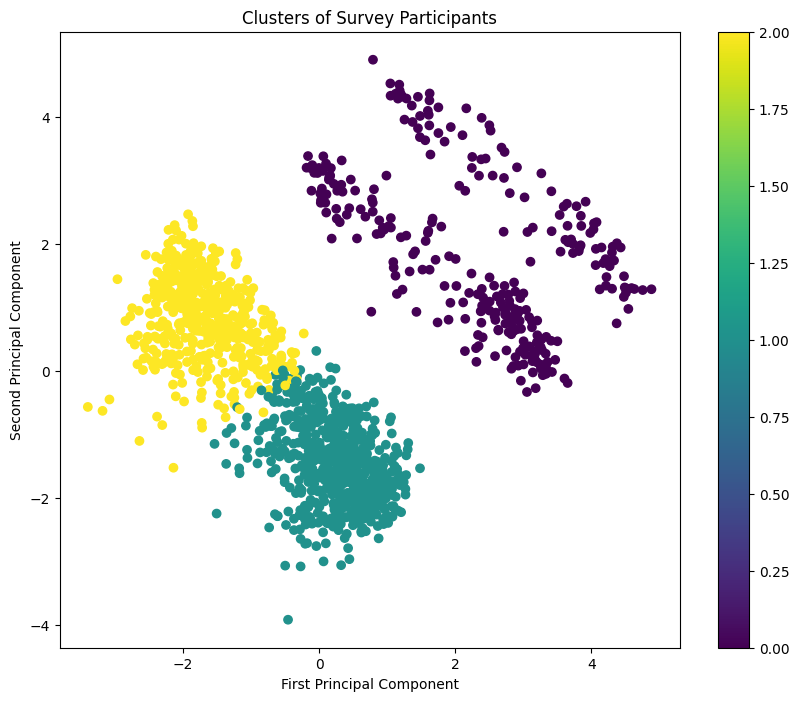

In [28]:
# Visualize clusters in 2D
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clusters of Survey Participants')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

In [29]:
# Visualize feature importance
feature_names = preprocessor.get_feature_names_out()
pca_components = pca.components_

In [30]:
# Ensure feature_importance has the same length as feature_names
feature_importance = np.sum(np.abs(pca_components), axis=0)
if len(feature_importance) != len(feature_names):
    print("Warning: Number of PCA components doesn't match number of features.")
    print(f"PCA components: {len(feature_importance)}, Features: {len(feature_names)}")
    # Use only the first n components that match the number of features
    feature_importance = feature_importance[:len(feature_names)]

In [31]:
# Sort features by importance
sorted_idx = feature_importance.argsort()
sorted_importance = feature_importance[sorted_idx]
sorted_features = np.array(feature_names)[sorted_idx]

In [32]:
# Plot top 20 features (or fewer if there are less than 20)
n_top_features = min(20, len(sorted_features))

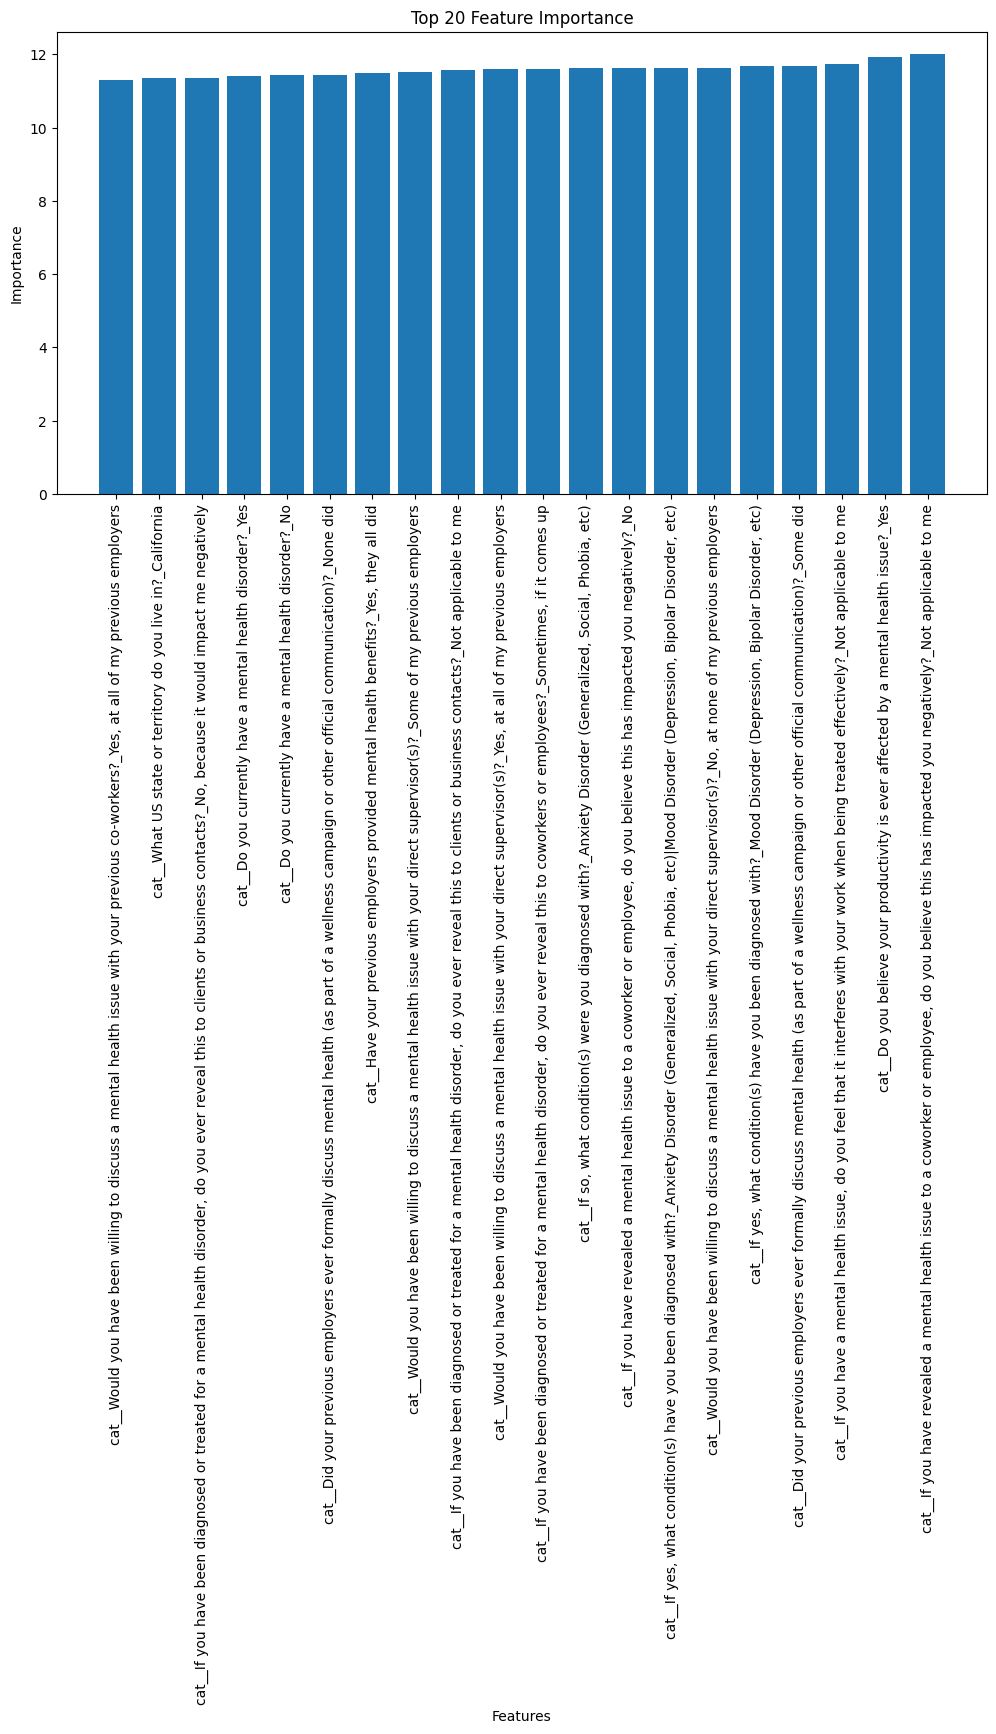

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(range(n_top_features), sorted_importance[-n_top_features:])
plt.title('Top 20 Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(range(n_top_features), sorted_features[-n_top_features:], rotation=90)
plt.tight_layout()
plt.show()

**Explanation:**  
We visualize the clusters in 2D using the first two principal components.  
We also visualize the importance of the top 20 features to understand which factors contribute most to the variation in the data.  

### 6. Cluster Analysis

In [34]:
df_with_clusters = pd.DataFrame(df_preprocessed, columns=preprocessor.get_feature_names_out())

In [35]:
df_with_clusters['Cluster'] = cluster_labels

In [36]:
for i in range(optimal_k):
    print(f"\nCluster {i} characteristics:")
    cluster_data = df_with_clusters[df_with_clusters['Cluster'] == i]
    print(cluster_data.mean().sort_values(ascending=False).head(10))


Cluster 0 characteristics:
num__Are you self-employed?                                                                                                                        1.989581
cat__Do you think that discussing a physical health issue with your employer would have negative consequences?_No                                  1.000000
cat__Do you know the options for mental health care available under your employer-provided coverage?_No                                            1.000000
cat__Does your employer provide mental health benefits as part of healthcare coverage?_Yes                                                         1.000000
cat__Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?_Yes                                            0.996528
cat__Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?_No     0.996528
cat__How many employees does your co

**Explanation:**  
We analyze each cluster by looking at the mean values of features within the cluster.  
This helps identify the main characteristics of each group of participants.

### 7. Recommendations

Based on the analysis, here are some potential recommendations for HR:  
1. Focus on improving mental health benefits and care options, as these seem to be important factors.  
2. Develop programs to address work interference due to mental health issues.  
3. Train supervisors and coworkers on how to support employees with mental health concerns.  
4. Create an environment where employees feel comfortable seeking help and discussing mental health.  
5. Consider the impact of remote work on mental health, as it appears to be a significant factor.  

**Justification:**  
These recommendations are based on the feature importance and cluster characteristics we identified.  
They target the most significant factors that seem to influence mental health in the workplace.  